In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pickle
import joblib
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("F:\DATA  SCIENCE\iNeuron\Thyroid Project\hypothyroid.csv")

In [3]:
data.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,0,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,0,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,0,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,0,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,0,SVI,P
5,18.0,F,t,f,f,f,f,f,f,f,...,t,183.0,t,1.30,t,141.0,f,0,other,P
6,59.0,F,f,f,f,f,f,f,f,f,...,t,72.0,t,0.92,t,78.0,f,0,other,P
7,80.0,F,f,f,f,f,f,f,f,f,...,t,80.0,t,0.70,t,115.0,f,0,SVI,P
8,66.0,F,f,f,f,f,f,f,f,f,...,t,123.0,t,0.93,t,132.0,f,0,SVI,P
9,68.0,M,f,f,f,f,f,f,f,f,...,t,83.0,t,0.89,t,93.0,f,0,SVI,P


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [5]:
data.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
TBG                            0
referral source                0
binaryClass                    0
dtype: int

In [6]:
# data.replace('?', np.nan, inplace = True)

In [7]:
# Droping column which have zero variance
# data = data.drop(['TBG measured', 'TBG'], axis = 1)

In [8]:
data.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,P
5,18.0,F,t,f,f,f,f,f,f,f,...,f,NaN,t,183.0,t,1.30,t,141.0,other,P
6,59.0,F,f,f,f,f,f,f,f,f,...,f,NaN,t,72.0,t,0.92,t,78.0,other,P
7,80.0,F,f,f,f,f,f,f,f,f,...,t,0.6,t,80.0,t,0.70,t,115.0,SVI,P
8,66.0,F,f,f,f,f,f,f,f,f,...,t,2.2,t,123.0,t,0.93,t,132.0,SVI,P
9,68.0,M,f,f,f,f,f,f,f,f,...,t,1.6,t,83.0,t,0.89,t,93.0,SVI,P


In [6]:
data.duplicated().sum()

61

In [7]:
data.shape

(3772, 30)

In [8]:
data = data.drop_duplicates()

In [9]:
data.shape

(3711, 30)

age       AxesSubplot(0.125,0.125;0.0945122x0.755)
TSH    AxesSubplot(0.238415,0.125;0.0945122x0.755)
T3     AxesSubplot(0.351829,0.125;0.0945122x0.755)
TT4    AxesSubplot(0.465244,0.125;0.0945122x0.755)
T4U    AxesSubplot(0.578659,0.125;0.0945122x0.755)
FTI    AxesSubplot(0.692073,0.125;0.0945122x0.755)
TBG    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

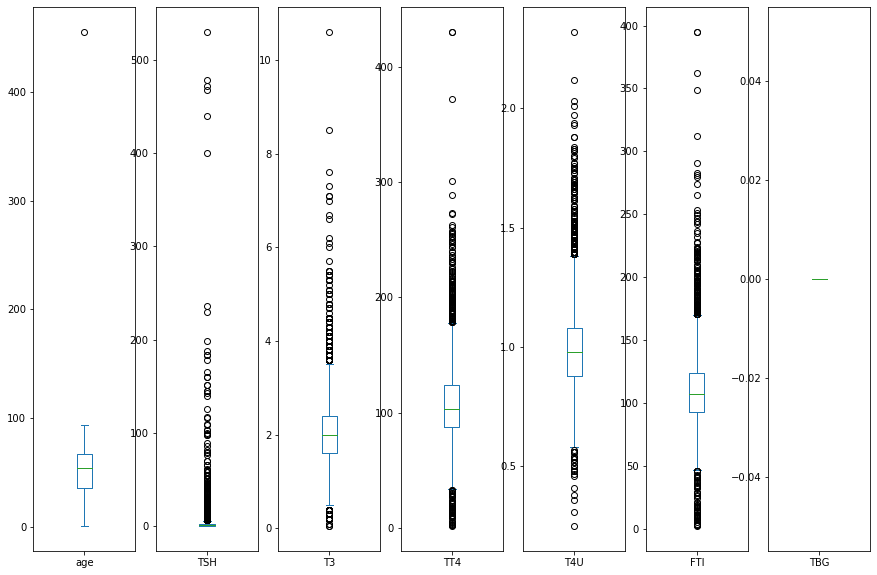

In [10]:
data.plot(kind = "box", subplots = True, sharey = False, figsize = (15, 10))

In [11]:
data.isna().sum()

age                            1
sex                          149
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          309
T3 measured                    0
T3                           709
TT4 measured                   0
TT4                          171
T4U measured                   0
T4U                          327
FTI measured                   0
FTI                          325
TBG measured                   0
TBG                            0
referral source                0
binaryClass                    0
dtype: int

In [12]:
median_imputer = SimpleImputer(missing_values = np.nan, strategy = "median")
data[['age','TSH','T3','TT4','T4U','FTI']] = median_imputer.fit_transform(data[['age','TSH','T3','TT4','T4U','FTI']])

In [13]:
mod_imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
data[['sex']] = mod_imputer.fit_transform(data[['sex']])

In [14]:
data.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [18]:
#Label Encodng

for i in data:
    l_e = LabelEncoder()
    data[i] = l_e.fit_transform(data[i])

In [19]:
data

# 0 = false
# 1 = true

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,binaryClass
0,38,0,0,0,0,0,0,0,0,0,...,1,26,1,121,1,72,1,102,1,1
1,20,0,0,0,0,0,0,0,0,0,...,1,21,1,98,0,56,0,100,4,1
2,43,1,0,0,0,0,0,0,0,0,...,0,21,1,105,1,48,1,113,4,1
3,67,0,1,0,0,0,0,0,0,0,...,1,20,1,171,0,56,0,100,4,1
4,67,0,0,0,0,0,0,0,0,0,...,1,12,1,57,1,44,1,63,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,27,0,0,0,0,0,0,0,0,0,...,0,21,0,99,0,56,0,100,4,1
3768,65,0,0,0,0,0,0,0,0,0,...,1,22,1,120,1,66,1,107,3,1
3769,71,0,0,0,0,0,0,0,0,0,...,1,19,1,108,1,65,1,98,4,1
3770,69,1,0,0,0,0,0,0,0,0,...,1,21,1,78,1,51,1,80,3,1


In [20]:
X = data.iloc[:, :27]

In [21]:
X

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source
0,38,0,0,0,0,0,0,0,0,0,...,110,1,26,1,121,1,72,1,102,1
1,20,0,0,0,0,0,0,0,0,0,...,138,1,21,1,98,0,56,0,100,4
2,43,1,0,0,0,0,0,0,0,0,...,103,0,21,1,105,1,48,1,113,4
3,67,0,1,0,0,0,0,0,0,0,...,21,1,20,1,171,0,56,0,100,4
4,67,0,0,0,0,0,0,0,0,0,...,77,1,12,1,57,1,44,1,63,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,27,0,0,0,0,0,0,0,0,0,...,111,0,21,0,99,0,56,0,100,4
3768,65,0,0,0,0,0,0,0,0,0,...,105,1,22,1,120,1,66,1,107,3
3769,71,0,0,0,0,0,0,0,0,0,...,148,1,19,1,108,1,65,1,98,4
3770,69,1,0,0,0,0,0,0,0,0,...,75,1,21,1,78,1,51,1,80,3


In [22]:
y = data['binaryClass']

In [23]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3767    1
3768    1
3769    1
3770    1
3771    1
Name: binaryClass, Length: 3711, dtype: int32

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 12)

x_smote, y_smote = smote.fit_resample(X, y)

In [25]:
print(y_smote.value_counts())

1    3420
0    3420
Name: binaryClass, dtype: int64


In [26]:
def norm(i):
    x = (i - i.min()) / (i.max() - i.min())
    return (x)

In [27]:
x_smote_norm = norm(x_smote)

In [28]:
x_smote_norm

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source
0,0.413043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.384615,1.0,0.382353,1.0,0.504167,1.0,0.496552,1.0,0.437768,0.25
1,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.482517,1.0,0.308824,1.0,0.408333,0.0,0.386207,0.0,0.429185,1.00
2,0.467391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.360140,0.0,0.308824,1.0,0.437500,1.0,0.331034,1.0,0.484979,1.00
3,0.728261,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.073427,1.0,0.294118,1.0,0.712500,0.0,0.386207,0.0,0.429185,1.00
4,0.728261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.269231,1.0,0.176471,1.0,0.237500,1.0,0.303448,1.0,0.270386,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,0.586957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.650350,0.0,0.294118,1.0,0.400000,1.0,0.475862,1.0,0.351931,0.75
6836,0.369565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.720280,1.0,0.191176,1.0,0.404167,1.0,0.289655,1.0,0.476395,1.00
6837,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.947552,1.0,0.058824,1.0,0.050000,1.0,0.462069,1.0,0.060086,0.75
6838,0.608696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.590909,1.0,0.308824,1.0,0.479167,1.0,0.413793,1.0,0.467811,1.00


In [29]:
data['binaryClass'].value_counts()

1    3420
0     291
Name: binaryClass, dtype: int64

In [30]:
# 1 --> No Disease
# 0 --> Disease

## Model Building

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.30, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4788, 27)
(2052, 27)
(4788,)
(2052,)


In [33]:
# !pip install lazypredict

## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc_model = RandomForestClassifier(n_estimators = 50, random_state = 10)
rfc_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=10)

In [36]:
y_pred_rfc = rfc_model.predict(X_test)

In [37]:
y_pred_rfc

array([1, 0, 0, ..., 0, 1, 0])

In [38]:
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("TEST ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_rfc))


TEST ACCURACY OF THE MODEL:  0.9956140350877193


In [39]:
print("Train Acuuracy of rfc_model: ",rfc_model.score(X_train, y_train))

Train Acuuracy of rfc_model:  1.0


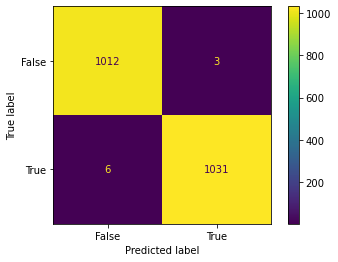

In [40]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## SVC

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test , SVC(kernel='rbf').fit(X_train , y_train).predict(X_test))

0.9785575048732943

## XGBoost Classifier

In [43]:
from xgboost import XGBClassifier

In [44]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
# Training acuuracy

xgb_model.score(X_train, y_train)

1.0

In [46]:
y_pred_xgb = xgb_model.predict(X_test)

y_pred_xgb

array([1, 0, 0, ..., 0, 1, 0])

In [47]:
metrics.accuracy_score(y_test, y_pred_xgb)

0.9956140350877193

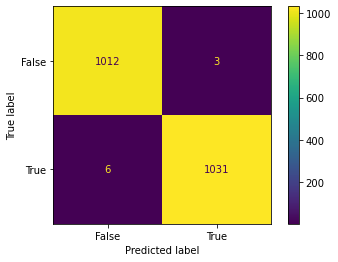

In [48]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])


cm_display.plot()
plt.show()

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logit = LogisticRegression()

logit_model = logit.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
y_pred_logit = logit_model.predict(X_test)

y_pred_logit

array([1, 0, 0, ..., 0, 1, 0])

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print("Test Accuracy of logit_model: ", accuracy_score(y_test, y_pred_logit))

Test Accuracy of logit_model:  0.9780701754385965


In [54]:
# Training Accuracy

print("Train Accuracy of logit_model: ",logit_model.score(X_train, y_train))

Train Accuracy of logit_model:  0.9780701754385965


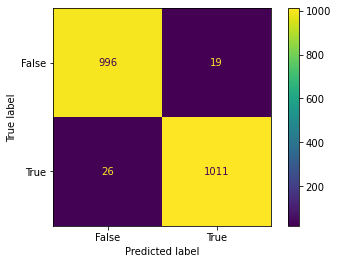

In [55]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_logit)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])


cm_display.plot()
plt.show()

In [56]:
import pickle

In [57]:
pickle.dump((xgb_model), open("model.pkl", "wb"))

In [58]:
import os
os.getcwd()

'C:\\Users\\Asus\\Thyroid project'